In [1]:
import os 
import cv2
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator




You'll have to install each one first, installing on your machine is usually easy and just commands like "pip install tensorflow"
Use anaconda navigator, it'd be easier for you to run everyting

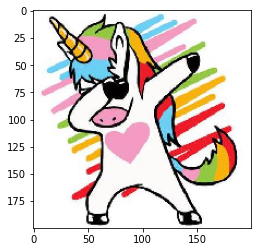

In [2]:
img = image.load_img("0.jpg" , target_size=(200, 200))
plt.imshow(img)

Nojoud in her finest form hehe

In [3]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('acc') > 0.98) & (logs.get('val_acc') > 0.9):
            print("\n Reached 98% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [4]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [5]:
train_generator = train.flow_from_directory(
        'training/',  
        target_size=(200, 200),  
        batch_size=3,
       
        class_mode='binary')

validation_generator = validation.flow_from_directory(
        'validation/', 
        target_size=(200, 200),  
        batch_size=3,
        
        class_mode='binary')

Found 22 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'happy': 0, 'sad': 1}

In [7]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 4
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 5
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-06),
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=20,
      validation_data = validation_generator,callbacks=[callbacks])



Epoch 1/20
5/5 [==============================] - 2s 362ms/step - loss: 1.3759 - acc: 0.5385 - val_loss: 0.6853 - val_acc: 0.5333
Epoch 2/20
5/5 [==============================] - 0s 98ms/step - loss: 0.6948 - acc: 0.4667 - val_loss: 0.7676 - val_acc: 0.4667
Epoch 3/20
5/5 [==============================] - 0s 68ms/step - loss: 0.7221 - acc: 0.4667 - val_loss: 0.6925 - val_acc: 0.4667
Epoch 4/20
5/5 [==============================] - 0s 69ms/step - loss: 0.7088 - acc: 0.2727 - val_loss: 0.6903 - val_acc: 0.5333
Epoch 5/20
5/5 [==============================] - 0s 76ms/step - loss: 0.6821 - acc: 0.7333 - val_loss: 0.6830 - val_acc: 0.5333
Epoch 6/20
5/5 [==============================] - 0s 63ms/step - loss: 0.7202 - acc: 0.4000 - val_loss: 0.6908 - val_acc: 0.5333
Epoch 7/20
5/5 [==============================] - 0s 74ms/step - loss: 0.6966 - acc: 0.5385 - val_loss: 0.6913 - val_acc: 0.5333
Epoch 8/20
5/5 [==============================] - 0s 61ms/step - loss: 0.6940 - acc: 0.4615 - va

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       7

In [11]:
!mkdir -p saved_model
model.save('saved_model/my_model') # this will save the weights of the training for future usage

In [ ]:
dir_path = "test" #folder name
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        print("Happy Nojoud")
    else:
        print("sad Nojoud")
